In [ ]:
#6.1

import numpy as np

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.1):
        self.weights = np.random.rand(num_inputs + 1) * 0.1 - 0.05
        self.learning_rate = learning_rate

    def activation(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        inputs = np.insert(inputs, 0, 1)
        return self.activation(np.dot(self.weights, inputs))

    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = target - prediction
        self.weights += self.learning_rate * error * np.insert(inputs, 0, 1)

class ORGate:
    def __init__(self):
        self.perceptron = Perceptron(2)
        self.perceptron.weights = np.array([-0.3, 0.5, 0.5])

    def evaluate(self, x1, x2):
        return self.perceptron.predict([x1, x2])

class ANDGate:
    def __init__(self):
        self.perceptron = Perceptron(2)
        self.perceptron.weights = np.array([-0.8, 0.5, 0.5])

    def evaluate(self, x1, x2):
        return self.perceptron.predict([x1, x2])

or_gate = ORGate()
and_gate = ANDGate()
test_cases = [(0, 0), (0, 1), (1, 0), (1, 1)]
print("OR Gate:")
for test_case in test_cases:
    result = or_gate.evaluate(*test_case)
    print(f"{test_case} -> {result}")
print("\nAND Gate:")
for test_case in test_cases:
    result = and_gate.evaluate(*test_case)
    print(f"{test_case} -> {result}")

OR Gate:
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1

AND Gate:
(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1


Missing values:
race_id              0
horse_id             0
1-101            64722
1-102            64602
1-103            64641
                 ...  
4-115            10352
4-116            11402
4-117             9470
calc_position        4
price                0
Length: 64, dtype: int64
Duplicate rows:
0


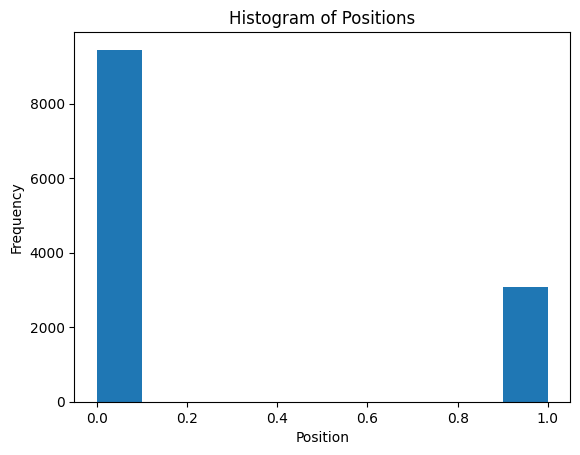

Accuracy: 0.7043478260869566


In [ ]:
#6.2

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#1. Load the given dataset
df = pd.read_csv('/content/horseRacing - horseRacing.csv')

#2. Clean the dataset
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)
duplicate_rows = df.duplicated().sum()
print("Duplicate rows:")
print(duplicate_rows)
df = df.dropna()
df = df.drop_duplicates()

#3. Convert labels into 0 or 1
df['calc_position'] = df['calc_position'].apply(lambda x: 1 if x <= 3 else 0)

#4. Plot statistics to perform exploratory data analysis
plt.hist(df['calc_position'])
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Histogram of Positions')
plt.show()

#5. What is wrong with dataset, how to solve it?
# It seems the dataset might be imbalanced as there are significantly more instances with calc_position as 0.
# To solve this, we could try balancing the dataset by oversampling the minority class or using techniques like SMOTE.

#6. Implement one hot encoding on Race ID Column
race_encoder = OneHotEncoder()
race_encoded = race_encoder.fit_transform(df['race_id'].values.reshape(-1, 1)).toarray()
race_encoded_df = pd.DataFrame(race_encoded, columns=[f'race_{int(cat)}' for cat in race_encoder.categories_[0]])

#7. Implement One hot encoding for Horse ID Column
horse_encoder = OneHotEncoder()
horse_encoded = horse_encoder.fit_transform(df['horse_id'].values.reshape(-1, 1)).toarray()
horse_encoded_df = pd.DataFrame(horse_encoded, columns=[f'horse_{int(cat)}' for cat in horse_encoder.categories_[0]])

#8. Bonus: Use MLP to tarin a classifier
common_indices = race_encoded_df.index.intersection(horse_encoded_df.index).intersection(df.index)
race_encoded_df = race_encoded_df.loc[common_indices]
horse_encoded_df = horse_encoded_df.loc[common_indices]
df = df.loc[common_indices]
X = pd.concat([df.iloc[:, 3:-2], race_encoded_df, horse_encoded_df], axis=1)
y = df['calc_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")